$$K(\Delta t;d)=\frac{1}{\sqrt{4\pi\Delta t\frac{R_{i}}{C_{m}}}}\exp(-\frac{\Delta t}{C_{m}R_{m}})\exp(-\frac{d^{2}}{4\Delta t\frac{R_{i}}{C_{m}}})\Theta(\Delta t)$$

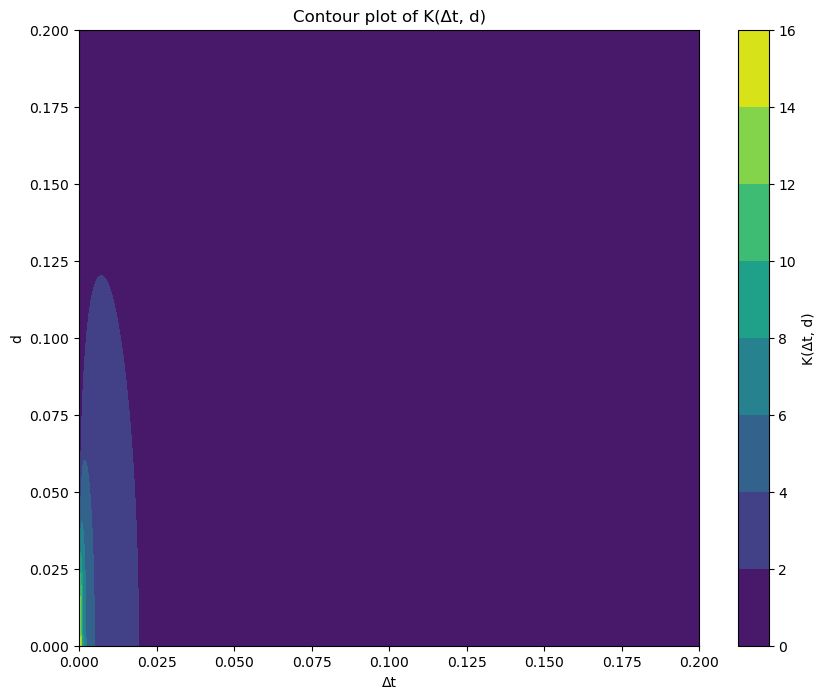

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define the function K in PyTorch
def K(delta_t, d, R_i, C_m, R_m):
    term1 = 1 / torch.sqrt(4 * np.pi * delta_t * R_i / C_m)
    term2 = torch.exp(-delta_t / (C_m * R_m))
    term3 = torch.exp(-d**2 / (4 * delta_t * R_i / C_m))
    theta = torch.heaviside(delta_t, torch.tensor([0.0]))
    return term1 * term2 * term3 * theta

# Parameters
R_i = 1.0
C_m = 1.0
R_m = 1.0

# Generate ranges for delta_t and d
delta_t_values = torch.linspace(0, 0.2, 500)
d_values = torch.linspace(0, 0.2, 500)

# Create a meshgrid for delta_t and d
delta_t_grid, d_grid = torch.meshgrid(delta_t_values, d_values, indexing='ij')

# Compute K for each pair of (delta_t, d)
K_values = K(delta_t_grid, d_grid, R_i, C_m, R_m)

# Plot the results
plt.figure(figsize=(10, 8))
plt.contourf(delta_t_grid.numpy(), d_grid.numpy(), K_values.numpy(), cmap='viridis')
plt.colorbar(label='K(Δt, d)')
plt.xlabel('Δt')
plt.ylabel('d')
plt.title('Contour plot of K(Δt, d)')
plt.show()

In [17]:
from circuit_toolkit.plot_utils import saveallforms 
figdir = r"/n/home12/binxuwang/Github/Dendrite-KAN/figures"

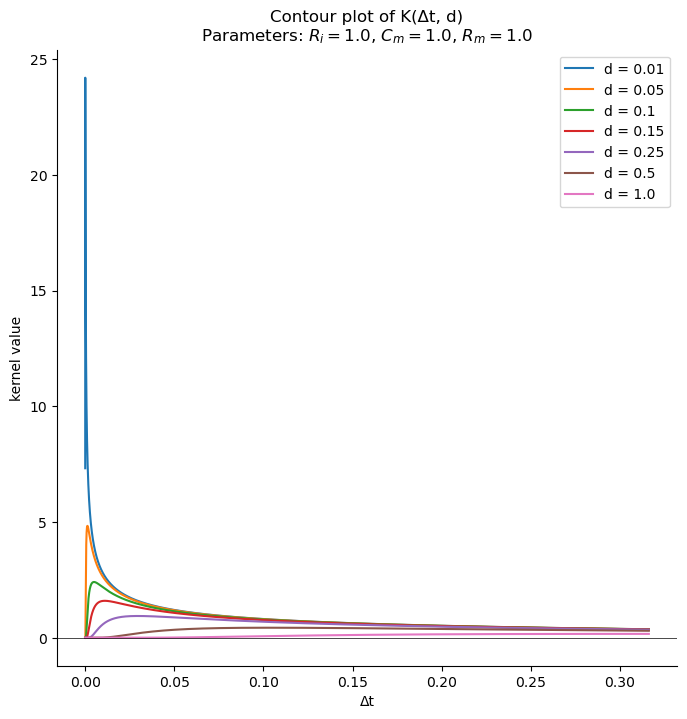

In [21]:

# Parameters
R_i = 1.0
C_m = 1.0
R_m = 1.0
# Generate ranges for delta_t and d
# delta_t_values = torch.linspace(0, 0.2, 1000)
delta_t_values = torch.logspace(-5,-0.5,1000)
# Plot the results
plt.figure(figsize=(8, 8))
for d in [0.01, 0.05, 0.1, 0.15, 0.25, 0.50, 1.0]:
    plt.plot(delta_t_values.numpy(), K(delta_t_values, d, R_i, C_m, R_m).numpy(), label=f'd = {d}')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Δt')
plt.ylabel('kernel value')
plt.legend()
plt.title(f'Contour plot of K(Δt, d)\nParameters: $R_i={R_i}$, $C_m={C_m}$, $R_m={R_m}$')
saveallforms(figdir, 'LinearCable_kernel_shape_w_dist', )
plt.show()